# Lecture 4 - SciPy


What we have seen so far
- How to setup a python environment and jupyter notebooks
- Basic python language features
- Introduction to NumPy
- Plotting using matplotlib

Scipy is a collection of packages that provide useful mathematical functions commonly used for scientific computing.

List of subpackages
- cluster : Clustering algorithms
- constants : Physical and mathematical constants
- fftpack : Fast Fourier Transform routines
- integrate : Integration and ordinary differential equation solvers
- interpolate : Interpolation and smoothing splines
- io : Input and Output
- linalg : Linear algebra
- ndimage : N-dimensional image processing
- odr : Orthogonal distance regression
- optimize : Optimization and root-finding routines
- signal : Signal processing
- sparse : Sparse matrices and associated routines
- spatial : Spatial data structures and algorithms
- special : Special functions
- stats : Statistical distributions and functions

We cannot cover all of them in detail but we will go through some of the packages and their capabilities today

- interpolate
- optimize
- stats
- integrate

We will also briefly look at some other useful packages
- networkx
- sympy

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Interpolation : `scipy.interpolate`

In [3]:
import scipy.interpolate as interp

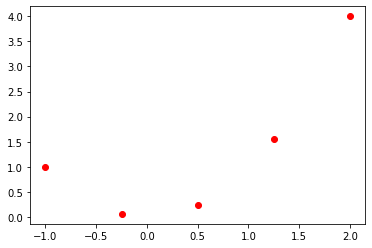

In [4]:
x = np.linspace(-1,2,5);
y = x**2
plt.plot(x,y,'ro')

In [5]:
f = interp.interp1d(x,y,kind="linear")

In [6]:
type(f)

scipy.interpolate.interpolate.interp1d

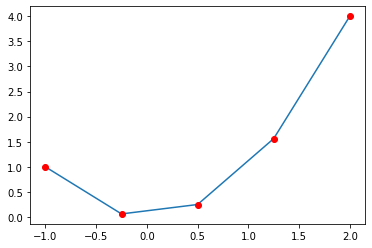

In [7]:
x_fine = np.linspace(-1,2,100)
plt.plot(x_fine,f(x_fine))
plt.plot(x,y,'ro')

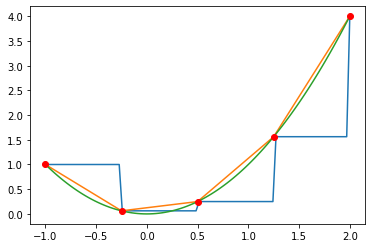

In [8]:
plt.plot(x_fine,interp.interp1d(x,y,kind="zero")(x_fine))
plt.plot(x_fine,interp.interp1d(x,y,kind="linear")(x_fine))
plt.plot(x_fine,interp.interp1d(x,y,kind="cubic")(x_fine))
plt.plot(x,y,'ro')

In [9]:
interp.interp1d?

In [10]:
interp.interp2d?

## Optimization : `scipy.optimize`

Contains functions to find minima, roots and fit parameters 

In [11]:
from scipy import optimize

In [12]:
def f(x):
    return x**2 + np.sin(2*x)

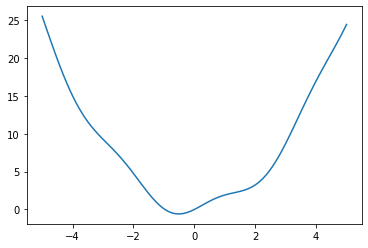

In [13]:
x = np.linspace(-5,5,100)
plt.plot(x,f(x));

In [14]:
results = optimize.minimize(f, -4)
optimize.minimize?

In [15]:
x_opt = results.x

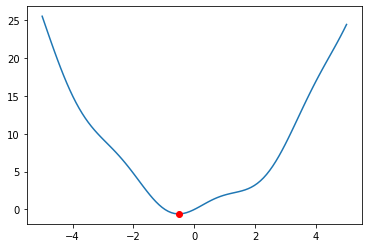

In [16]:
plt.plot(x,f(x));
plt.plot(x_opt,f(x_opt),'ro');

In [17]:
optimize.minimize?

In [18]:
def f(x):
    return x[0]*x[0] + x[1]*x[1] + 5*(np.sin(2*x[0]) + np.sin(2*x[1]) )

In [19]:
x=np.linspace(-5,5,100)
y=np.linspace(-5,5,100)
X,Y = np.meshgrid(x,y)

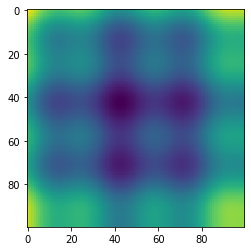

In [20]:
plt.imshow(f((X,Y)))

In [21]:
optimize.minimize(f,x0=[2,2])
optimize.basinhopping?

You can use the function `basinhopping` to find the global minima

In [22]:
optimize.basinhopping(f,[1,4])

                        fun: -4.3997497511605905
 lowest_optimization_result:       fun: -4.3997497511605905
 hess_inv: array([[ 4.97129027e-02, -5.89460502e-05],
       [-5.89460502e-05,  4.58130065e-02]])
      jac: array([1.78813934e-07, 1.78813934e-07])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 6
     njev: 9
   status: 0
  success: True
        x: array([ 2.13554766, -0.71377589])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 3356
                        nit: 100
                       njev: 839
                          x: array([ 2.13554766, -0.71377589])

In [23]:
optimize.basinhopping?

## Curve Fitting

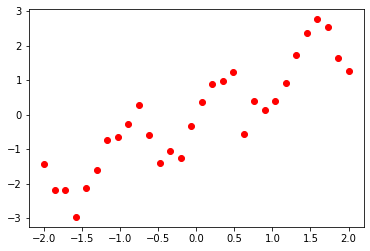

In [24]:
x = np.linspace(-2,2,30)
y = x+np.sin(5.2*x)+0.3*np.random.randn(30)
plt.plot(x,y,'ro')

In [25]:
def f(x,a,b,c):
    return a*x + b*np.sin(c*x)

In [26]:
((a,b,c),cov) = optimize.curve_fit(f,x,y,(0,0,4))
optimize.curve_fit?
a,b,c

(1.0475971647703015, 0.9133535581426673, 5.116448059198275)

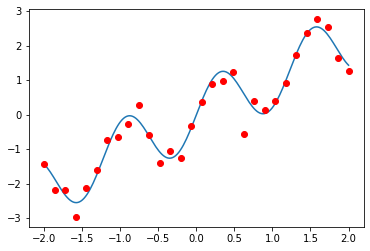

In [27]:
x_fine = np.linspace(-2,2,200)
plt.plot(x_fine,f(x_fine,a,b,c))
plt.plot(x,y,'ro')

### Root Finding

In [28]:
def f(x):
    return (x+2)*(x-1)*(x-5)

In [29]:
optimize.root(f,0)

    fjac: array([[-1.]])
     fun: array([7.99360578e-15])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-1.11436793e-08])
       r: array([12.00000791])
  status: 1
 success: True
       x: array([1.])

## Statistics : `scipy.stats`

In [30]:
from scipy import stats

Find the maximum likelihood estimate for parameters

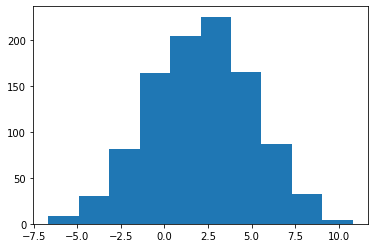

In [31]:
samples = 3*np.random.randn(1000)+2
plt.hist(samples);

In [32]:
stats.norm.fit(samples)

(2.0991044222498347, 2.959262097306776)

In [33]:
np.mean(samples),np.median(samples)

(2.0991044222498347, 2.1638474096553235)

In [34]:
stats.scoreatpercentile(samples,20)

-0.37163701627431045

In [35]:
a = np.random.randn(30)
b = np.random.randn(30) + 0.1

In [36]:
stats.ttest_ind(a,b)

Ttest_indResult(statistic=-0.2918882392264538, pvalue=0.7714135735360593)

You can also perform kernel density estimation

In [37]:
x = np.concatenate(( 2*np.random.randn(1000)+5,  0.6*np.random.randn(1000)-1) )

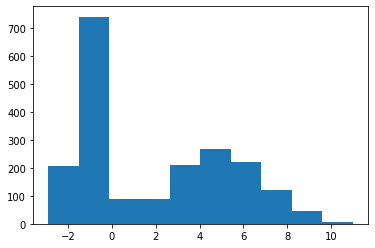

In [38]:
plt.hist(x);

In [39]:
pdf = stats.kde.gaussian_kde(x)

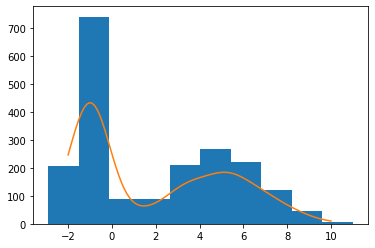

In [40]:
counts,bins,_ = plt.hist(x)
x_fine=np.linspace(-2,10,100)
plt.plot(x_fine,np.sum(counts)*pdf(x_fine))

In [41]:
bins

array([-2.90406807, -1.51477989, -0.12549171,  1.26379647,  2.65308464,
        4.04237282,  5.431661  ,  6.82094918,  8.21023736,  9.59952554,
       10.98881371])

## Numerical Integration : `scipy.integrate`

In [42]:
import scipy.integrate as integ

You can compute integral using the `quad` funtion

In [43]:
def f(x):
    return x**2 + 5*x + np.sin(x)

In [44]:
integ.quad(f,-1,1)

(0.6666666666666667, 6.547013372677054e-14)

In [45]:
integ.quad?

You can also solve ODEs of the form
$$ \frac{dy}{dt} = f(y,t) $$

In [46]:
def f(y,t):
    return (y[1], -y[1]-9*y[0])

In [47]:
t = np.linspace(0,10,100)
Y = integ.odeint(f,[1,1],t)

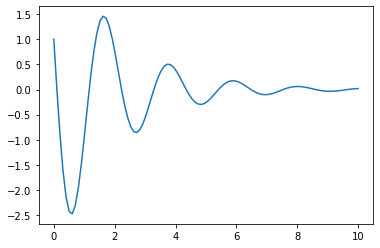

In [48]:
plt.plot(t,Y[:,1])

# Other useful packages

## `networkx`
Useful Package to handle graphs.

Install by running `conda install networkx`

In [49]:
import networkx as nx

In [50]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4])
G.add_edge(1,2)
G.add_edge(2,3)
G.add_edge(3,1)
G.add_edge(3,4)

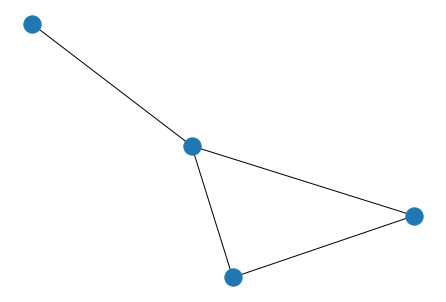

In [51]:
nx.draw(G)

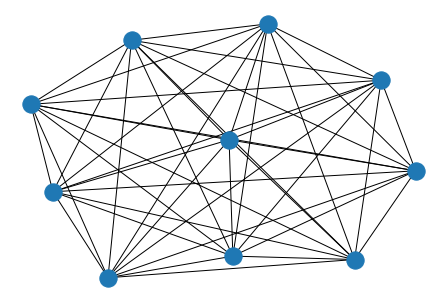

In [52]:
G = nx.complete_graph(10)
nx.draw(G)

## `sympy`

Package for performing symbolic computation and manipulation.

Install it in your environment by running `conda install sympy`

In [54]:
from sympy import *

In [55]:
x,y = symbols("x y")

In [56]:
expr = x+y**2

In [57]:
x*expr

x*(x + y**2)

In [58]:
expand(x*expr)

x**2 + x*y**2

In [59]:
factor(x**2 -2*x*y + y**2)

(x - y)**2

In [60]:
latex(expr)

'x + y^{2}'

In [61]:
init_printing?

In [62]:
simplify( (x-y)**2 + (x+y)**2)

2*x**2 + 2*y**2

In [63]:
x**2/(y**3+y)

x**2/(y**3 + y)

In [64]:
(x**2/(y**3+y)).subs(y,1/(1+x))

x**2/(1/(x + 1) + (x + 1)**(-3))

In [65]:
(x**2/(y**3+y)).evalf(subs={'x':2, 'y':4})

0.0588235294117647

In [66]:
Integral(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))

Integral(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))

In [67]:
I = Integral(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))

In [68]:
I.doit()

pi

In [69]:
(sin(x)/(1+cos(x)))

sin(x)/(cos(x) + 1)

In [70]:
(sin(x)/(1+cos(x))).series(x,0,10)

x/2 + x**3/24 + x**5/240 + 17*x**7/40320 + 31*x**9/725760 + O(x**10)

## Exercises
The following exercises requires the combined usage of the packages we learnt today. 

1. Generate 10 random polynomials of order 5
    - Numerically and analytically integrate them from 0 to 1 and compare the answers.
    - Compute one minima for each polynomial and show that the analytically computed derivative is 0 at the minima
    - Randomly sample the polynomials in the range from 0 to 1, and see if you can recover the original coefficents by trying to fit a 5th order polynomial to the samples.
2. Read and learn about [Erdos-Renyi Random Graphs](https://en.wikipedia.org/wiki/Erd%C5%91s%E2%80%93R%C3%A9nyi_model). See if you can numerically verify some of the properties mentioned in the wiki, such as for what parameter values is the graph most likely connected.

In [73]:

def create_poly(array_polynomial):
    """:returns polynomial form
    e.g.
    create_poly([1,2,3])=x**2+2x+3
    """
    order = len(array_polynomial) - 1
    return sum([array_polynomial[k] * x ** (order - k)
                for k in range(order + 1)])


polynomials = np.random.rand(10, 6)
numerical_integration = [np.diff(np.polyval(
    np.polyint(polynomials[k, :]), [0, 1]))
    for k in range(10)]

x = smp.symbols('x')

analytical_integration = [smp.integrate(create_poly(polynomials[k, :]), (x, 0, 1))
                          for k in range(10)]
print(max(np.abs(np.array(analytical_integration) - np.squeeze(numerical_integration))))

# Compute one minima for each polynomial
minimize_points = [minimize(lambda x1: np.polyval(polynomial, x1), np.array(0)).x
                   for polynomial in polynomials]

derivatives = [np.polyval(np.polyder(polynomial), x1)
               for polynomial, x1 in zip(polynomials, minimize_points)]
print(derivatives)
"""Randomly sample the polynomials in the range from
 0 to 1, and see if you can recover
 the original coefficients by trying to fit a 5th order polynomial to the samples."""
polynomial = polynomials[0]
x = rnd.randn(100)
sample_polynomial = np.polyval(polynomial, x)
np.polyfit(x, sample_polynomial, int(5))


2.22044604925031e-16
[array([2.14751746e+35]), array([5.79332962e+34]), array([-1.02809993e-06]), array([8.19503655e+35]), array([-8.3198523e-06]), array([6.35522622e+33]), array([6.11525589e+34]), array([9.28133551e-06]), array([3.88887754e+35]), array([-2.79438816e-07])]


array([0.40653549, 0.50972423, 0.42306455, 0.50638029, 0.77505077,
       0.63633418])

In [ ]:

import networkx as nx



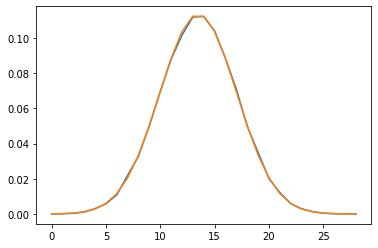

In [72]:
import collections

import networkx as nx
import numpy as np
import numpy.random as rnd
import scipy.special
import sympy as smp
from numpy import zeros
from scipy.optimize import minimize
p = 0.5
num_average = 1000
N = 50
sum_degrees = zeros(N, )
values = []
for _ in range(num_average):
    G = nx.erdos_renyi_graph(N, p)
    degrees = G.degree
    values += [degrees[value] for value in range(len(G))]

frequencies = {value: counter / (N * num_average) for value, counter in collections.Counter(values).items()}
frequencies = sorted(frequencies.items())
analytical = [scipy.special.binom(N - 1, k) * p ** k * (1 - p) ** (N - 1 - k) for k in range(N)]

graphs = np.zeros((len(frequencies), 2))

for k, (index, frequency) in enumerate(frequencies):
    graphs[k, :] = [frequency, analytical[index]]
plt.plot(graphs)
